In [1]:
%matplotlib inline

# The Average Thing #2

This time, we're going to take more in depth look at artifacts that are at the museum and what they are made of. The first thing we're going to do is load the data. Because the code for it is the first post, I'm just going to jump straight to the point where we've successfully processed the dimension data (and converted it to standardized numbers).

## A deeper dive into object dimensions

In the last post, we found that all of the dimensions appeared to be skewed in that the means were much higher than the medians. Let's plot them to see what those distributions look like.

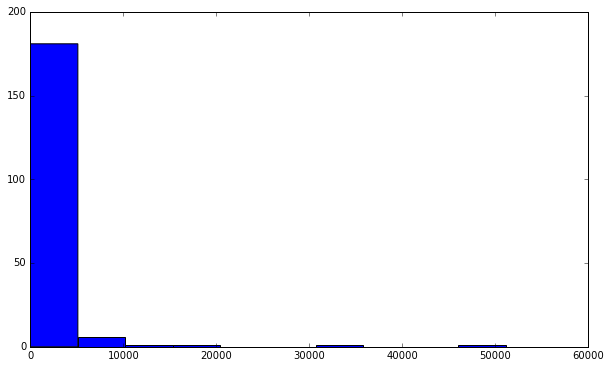

In [4]:
plt.figure(figsize = (10,6))
plt.hist(data['WeightNUM'].dropna());

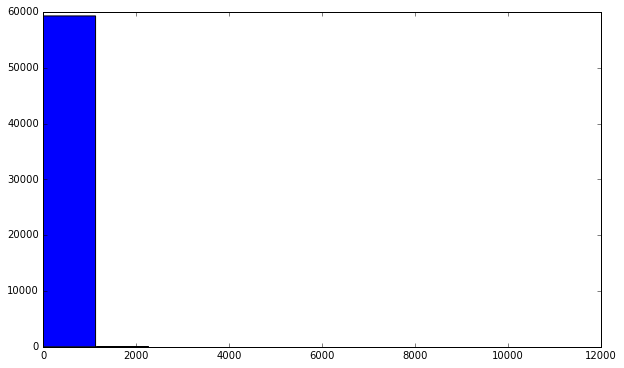

In [5]:
plt.figure(figsize = (10,6));
plt.hist(data['LengthNUM'].dropna());

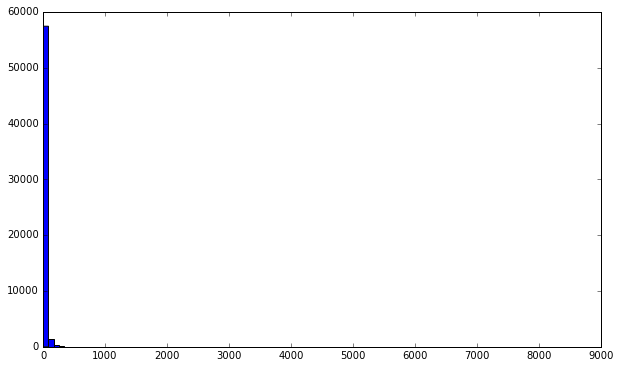

In [6]:
plt.figure(figsize = (10,6));
plt.hist(data['WidthNUM'].dropna(), bins = 100);

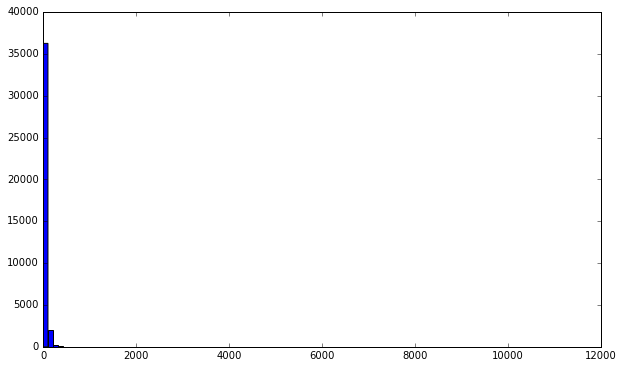

In [7]:
plt.figure(figsize = (10,6));
plt.hist(data['HeightNUM'].dropna(), bins = 100);

The graphs above suggest that there is basically a few (perhaps just one) object that is REALLY REALLY big, and that's pulling the mean up. Just for fun, let's find out what that object is.

In [8]:
data.sort_values(['LengthNUM'], ascending = False).iloc[0:3,:]

,artifactNumber,ObjectName,GeneralDescription,model,SerialNumber,Manufacturer,ManuCountry,ManuProvince,ManuCity,BeginDate,EndDate,date_qualifier,patent,NumberOfComponents,ArtifactFinish,ContextCanada,ContextFunction,ContextTechnical,group1,category1,...,Thickness,Weight,Diameter,image,thumbnail,LengthINT,LengthMULT,LengthNUM,HeightINT,HeightMULT,HeightNUM,WidthINT,WidthMULT,WidthNUM,WeightINT,WeightMULT,WeightNUM,ThicknessINT,ThicknessMULT,ThicknessNUM
81085,1999.0265.001,Parasail,.1 NYLON SAIL/ METAL FITTINGS/ PLASTIC & POLYE...,Astra 29,300316,APCO Aviation Ltd.,Israel,NaN,Netanya,1992,NaN,NaN,NaN,2.0,".1 BLUE, YELLOW AND GREEN NYLON SAIL;.2 PURPLE...",PARAGLIDING IS A DEVELOPMENT OF THE SPORT OF H...,A PARAGLIDER IS A CROSS BETWEEN A HANG GLIDER ...,ORIGINALLY DEVELOPED FROM THE SQUARE PARACHUTE...,Aviation,Aircraft,...,NaN,NaN,NaN,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,112.8,100.0,11280.0,NaN,NaN,NaN,29.8,100.0,2980.0,NaN,NaN,NaN,NaN,NaN,NaN
97539,2008.0001.001,Automobile,"metal, glass, fibre, resin, wood and synthetic...",Meteor/Montcalm,5066433 265A 61,Ford Motor Co. of Canada Ltd.,Canada,Ontario,Oakville,1961,NaN,NaN,NaN,12.0,Automobile has turquoise colour body; white ha...,Canadian-built and owned car considered to be ...,Owner driven passenger vehicle for general tra...,"Following WWll, the Ford Motor Co. offered pot...",Motorized Ground Transportation,Automotive vehicles,...,NaN,NaN,NaN,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,5200.0,1.0,5200.0,1405.00,1.0,1405.0,1210.0,1.0,1210.0,NaN,NaN,NaN,NaN,NaN,NaN
102774,2012.0039.001,Airplane,Limited information available at time of catal...,Boeing 720-023B,18024,Boeing Airplane Co.,United States of America,Washington,Seattle,1960,NaN,NaN,NaN,1.0,Red & white colour scheme. Limited information...,", C-FETB proved invaluable in validating elect...",Used in the testing of selected aircraft compo...,", Pratt & Whitney Canada (PWC) bought the Mode...",Aviation,Aircraft,...,NaN,NaN,NaN,NaN,NaN,41.4,100.0,4140.0,12.65,100.0,1265.0,39.9,100.0,3990.0,NaN,NaN,NaN,NaN,NaN,NaN


Apparently there is a paraglider that is 112.8 meters long. Let's pull up a picture of this thing. While we're at that, let's also look at this 5200 cm (52m) car. The last item is a Boeing 720. For that, ~40 meters seems reasonable, and it's what's listed on Wikipedia.

In [9]:
print data['image'].iloc[81085]
print data['image'].iloc[97539]

http://source.techno-science.ca/artifacts-artefacts/images/1999.0265.001.aa.cs.png
http://source.techno-science.ca/artifacts-artefacts/images/2008.0001.001.aa.cs.png


I'll be honest, I'm not sure this thing is that long: 
<img src="http://source.techno-science.ca/artifacts-artefacts/images/1999.0265.001.aa.cs.png">
Also, this looks like a regular car:
<img src="http://source.techno-science.ca/artifacts-artefacts/images/2008.0001.001.aa.cs.png">
These just look like very understandable typos, but they also suggest that we should use the median, which is relatively unaffected by these issues.

Using the median dimensions of all the artifacts, we can calculate the average density of the object, and compare it to this table: http://www.psyclops.com/tools/technotes/materials/density.html:

In [10]:
print 22.8*9.4*12 # volume in cm^3
print 16780/(22.8*9.4*12) # density in grams/cm^3

2571.84
6.52451163369


The density of the average artifact is 6.5 g/cm<sup>3</sup> or 6500 kg/m<sup>3</sup> and is closest to [Zirconium](https://en.wikipedia.org/wiki/Zirconium), but in general, consistent with some sort of metal. For reference, Aluminium has a density of 2700 kg/m<sup>3</sup>, Iron, 7870 kg/m<sup>3</sup>, and Gold, 19320 kg/m<sup>3</sup>. 

## Materials

So, what is the average artifact actually made of? There's a materials column that lists a bunch of different materials. Let's find a way extract those strings.

In [11]:
data['material'][50:60]

50                   metal->steel;glass
51                                  NaN
52    metal->steel;glass;synthetic;wood
53    metal->steel;glass;synthetic;wood
54       metal->steel;metal->brass;wood
55         metal->steel;synthetic;glass
56         metal->steel;synthetic;glass
57         metal->steel;synthetic;glass
58         metal->steel;synthetic;glass
59         metal->steel;synthetic;glass
Name: material, dtype: object

The format for these strings is an arrow -> to represent a subtype of material, and a semi-colon to represent different material. As a first pass, let's extract the different materials into a list:

In [12]:
data['material'].str.findall(r'\w+')[50:60]

50                     [metal, steel, glass]
51                                       NaN
52    [metal, steel, glass, synthetic, wood]
53    [metal, steel, glass, synthetic, wood]
54        [metal, steel, metal, brass, wood]
55          [metal, steel, synthetic, glass]
56          [metal, steel, synthetic, glass]
57          [metal, steel, synthetic, glass]
58          [metal, steel, synthetic, glass]
59          [metal, steel, synthetic, glass]
Name: material, dtype: object

There's probably a better way of separating sub-types of materials from the materials themselves, but the regex for that is beyond me at the moment, so let's run with this for now: As a quick and dirty way of guesstimating the main material of the average artifact, we can extract the first material in the list.

In [18]:
data['firstmaterial'] = data['material'].str.extract(r'^(\w+)', expand=False)

These are all the unique materials:

In [14]:
data['firstmaterial'].unique()

array(['paper', 'wood', 'metal', 'glass', nan, 'skin', 'synthetic',
       'fibre', 'resin', 'ceramic', 'stone', 'fluid', 'bone', 'composite',
       'plant', 'animal', 'shell'], dtype=object)

The next thing we want to do is form a dictionary with this list, and then add counts to it.

In [15]:
withmaterials = data.loc[data['firstmaterial'].isnull() == False] #use only rows with data
firstmaterials = dict.fromkeys(withmaterials['firstmaterial'].unique(), 0) #using the dict method .fromkeys(list, default value)

for material in withmaterials['firstmaterial']:
    firstmaterials[material] += 1

firstmaterials

{'animal': 39,
 'bone': 98,
 'ceramic': 799,
 'composite': 28,
 'fibre': 2117,
 'fluid': 9,
 'glass': 6177,
 'metal': 29370,
 'paper': 14106,
 'plant': 20,
 'resin': 513,
 'shell': 6,
 'skin': 774,
 'stone': 165,
 'synthetic': 7440,
 'wood': 6978}

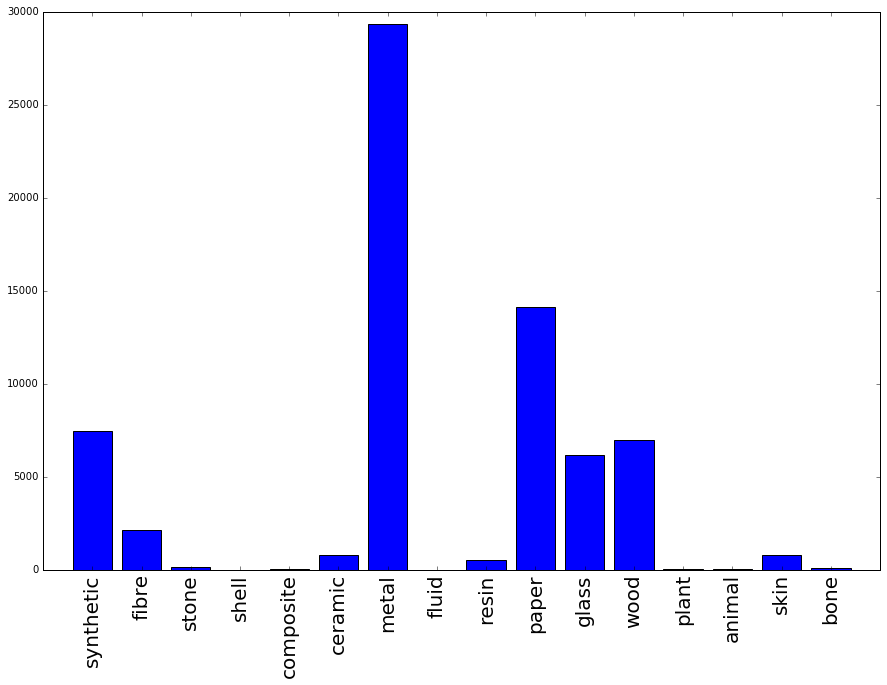

In [16]:
 #plot a bar graph where the axis goes from 0 to number of dictionary entries, and the values are the countes of those entires
plt.figure(figsize = (15,10))
plt.bar(range(0,len(firstmaterials)), firstmaterials.values(), align='center')
plt.xticks(range(0,len(firstmaterials)),firstmaterials.keys(),rotation = 'vertical', size = 20);
plt.xlim([-1,len(firstmaterials)]);

Here they are as percentages:

In [17]:
total = sum(firstmaterials.values())

for key, value in firstmaterials.iteritems():
    print key, str(round((float(value)/total)*100,2)) + "%"

synthetic 10.84%
fibre 3.08%
stone 0.24%
shell 0.01%
composite 0.04%
ceramic 1.16%
metal 42.79%
fluid 0.01%
resin 0.75%
paper 20.55%
glass 9.0%
wood 10.17%
plant 0.03%
animal 0.06%
skin 1.13%
bone 0.14%
